#**<u>Clasificación Estelar</u>**

####Desde siempre hemos mirado al cielo pensando en ¿quiénes somos? ¿por qué estamos aquí? ¿Qué son las estrellas?, en base a estas preguntas y otras más profundas y específicas, nace el estudio de los astros: la astronomía.
####En la Astronomía, la clasificación estelar se basa en características espectrales observables. Algunas de estas características son: filtro ultravioleta, filtro infrarrojo, corrimiento al rojo, etc.
####¿Pero es posible en base a estas características identificar estos objetos?
####Con esta pregunta en nuestras cabezas, elegimos un data frame que es un conjunto de 100.000 observaciones del espacio, obtenidas de la SDSS (Sloan Digital Sky Survey), el cúal es proyecto de investigación del espacio mediante imágenes en el espectro visible y de corrimiento rojo, realizadas en el telescopio Apache Point de Nuevo México.
####***Data frame:*** [Clasificación Estelar](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)
####Cada observación se describe en 17 columnas de características y 1 columna de clase que identifica a cada observación como estrella, galaxia o cuásar (galaxia recién nacida o bien la energía del agujero negro del centro de la galaxia recien nacida).
####Ahora bien, después de haber planteado nuestras preguntas y seleccionado una base de datos acorde al tema, surge una nueva y mas que importante pregunta, ¿Sirve nuestro data frame para realizar la clasificación deseada?

<br>

##<u>Analisis General de los Datos</u>

####Comencemos describiendo cada columna del data frame:

|N° | Nombre de Columna | Descripción |
|:----:|:---:|:----|
|1 |obj_ID |Identificador único de cada objeto |
|2 |alpha |Ángulo de ascensión derecha |
|3 |delta |Ángulo de declinación |
|4 |u |Filtro ultravioleta|
|5 |g |Filtro verde |
|6 |r |Filtro rojo |
|7 |i |Filtro infrarrojo cercano en el sistema fotométrico |
|8 |z |Filtro infrarrojo en el sistema fotométrico |
|9 |run_ID |Número de ejecución utilizado para identificar el análisis específico |
|10 |rereun_ID |Número de repetición para especificar cómo se procesó la imagen |
|11 |cam_col |Columna de cámara para identificar la línea de exploración dentro de la ejecución |
|12 |field_ID |Número de campo para identificar cada campo |
|13 |spec_obj_ID |Identificador único utilizado para objetos espectroscópicos ópticos (esto significa que 2 observaciones diferentes con el mismo spec_obj_ID deben compartir la clase de salida)|
|14 |class |Clase del objeto (galaxia, estrella o cuásar) |
|15 |redshift |Valor de corrimiento al rojo basado en el aumento de la longitud de onda |
|16 |plate |Identificador de placa del SDSS |
|17 |MJD |Fecha utilizada para indicar cuándo se tomó un determinado dato del SDSS |
|18 |fiber_ID |Identificador de fibra que apuntó la luz al plano focal en cada observación |


####Importemos las librerías con las que vamos a trabajar:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


####Importamos nuestro data frame en la variable declarada como "df"

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MKSuser/Unsam1/refs/heads/main/star_classification.csv')


####Printeamos los nombres de las columnas como vienen por default:

In [3]:
print(df.columns)

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')


####Renombramos los nombres de las variables, para hacerlas mas entendibles (información extraída del [sitio](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)):

In [4]:
df.rename(columns={'obj_ID': 'Id del objeto',
                   'alpha': 'Ang Asc Derecha',
                  'delta': 'Ang Declinación',
                   'u': 'Filtro ultravioleta',
                   'g':'Filtro verde',
                   'r': 'Filtro Rojo',
                   'i': 'Filtro Inf. cercano',
                   'z': 'Filtro Inf.',
                   'run_ID': 'Id de Analisis',
                   'rerun_ID': 'Id de repetición',
                   'cam_col': 'Columna de cámara',
                   'field_ID': 'Id de campo',
                   'spec_obj_ID': 'Id',
                   'class': 'Clase',
                   'redshift': 'Corrimiento al Rojo',
                   'plate': 'Id de placa SDSS',
                   'MJD': 'Fecha del dato',
                   'fiber_ID': 'Id de fibra',

                   },inplace=True)

####Identificamos que tipo de dato es cada columna:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id del objeto        100000 non-null  float64
 1   Ang Asc Derecha      100000 non-null  float64
 2   Ang Declinación      100000 non-null  float64
 3   Filtro ultravioleta  100000 non-null  float64
 4   Filtro verde         100000 non-null  float64
 5   Filtro Rojo          100000 non-null  float64
 6   Filtro Inf. cercano  100000 non-null  float64
 7   Filtro Inf.          100000 non-null  float64
 8   Id de Analisis       100000 non-null  int64  
 9   Id de repetición     100000 non-null  int64  
 10  Columna de cámara    100000 non-null  int64  
 11  Id de campo          100000 non-null  int64  
 12  Id                   100000 non-null  float64
 13  Clase                100000 non-null  object 
 14  Corrimiento al Rojo  100000 non-null  float64
 15  Id de placa SDSS  

####Como podemos observar, la columna 13 "Clase" es un objeto, así que posiblemente sea nuestra "salida".

####Para entender mejor la composición de los datos, imprimimos 5 muestras aleatorias:

In [6]:
df.sample(5)

,Id del objeto,Ang Asc Derecha,Ang Declinación,Filtro ultravioleta,Filtro verde,Filtro Rojo,Filtro Inf. cercano,Filtro Inf.,Id de Analisis,Id de repetición,Columna de cámara,Id de campo,Id,Clase,Corrimiento al Rojo,Id de placa SDSS,Fecha del dato,Id de fibra
75916,1.237664e+18,45.929350,-0.789137,20.02195,17.94174,17.07402,16.76195,16.58345,4263,301,2,422,8.168526e+18,STAR,0.000167,7255,56597,443
12621,1.237658e+18,43.300942,0.701699,24.06319,21.90396,21.33457,21.32065,21.02980,2820,301,5,155,4.776243e+18,QSO,6.706752,4242,55476,640
96968,1.237681e+18,355.703696,35.362158,24.54786,25.02720,22.09639,20.88829,20.02615,8156,301,5,212,8.736012e+18,GALAXY,0.565636,7759,58401,561
10005,1.237665e+18,230.584043,22.095573,20.48088,18.54757,17.61411,17.18335,16.91798,4649,301,4,303,2.433143e+18,GALAXY,0.098199,2161,53878,266
57203,1.237666e+18,235.020596,23.026900,23.66694,21.90632,21.42381,21.06299,20.40391,4671,301,5,41,4.439627e+18,QSO,1.754552,3943,55336,742


####Definitivamente la columna "Clase" es nuestra salida para poder hacer nuestra clasificación estelar.

####Antes de continuar, observemos en detalle nuestra columna "clase", contemos cuantas salidas posibles tiene y en que cantidades:

In [7]:
df["Clase"].value_counts()

,count
Clase,
GALAXY,59445
STAR,21594
QSO,18961


####Realizamos lo mismo, pero esta vez limpiando los posibles NaN:

In [8]:
df = df.dropna()

df["Clase"].value_counts()

,count
Clase,
GALAXY,59445
STAR,21594
QSO,18961


####Como podemos observar, no hay ningún NaN.

####Ahora bien, ya pudimos determinar que las 3 salidas posibles son "GALAXY" (galaxia), "STAR" (estrella) y "QSO" (cuásar) y cuantas hay de cada una.
####Sabiendo esto, convertiremos cada clase en un número (creamos un diccionario), esto nos ayudará a buscar correlatividades:

In [9]:
class_rep = {
     "GALAXY": 0,
     "STAR":   1,
     "QSO":    2,
}

####Para hacer uso de una buena práctica, creamos una nueva variable "df_limpio" y guardamos el data frame dentro de ella, para poder modificaciones para un mejor analisis de datos. Luego reemplazamos los datos de la columna "clase" por los creados en el paso anterior y movemos la columna "clase" al final para un mejor ordenamiento:

In [10]:
df_limpio = df

df_limpio['Clase'] = df_limpio['Clase'].replace(class_rep)

df_limpio = df_limpio[[col for col in df.columns if col != 'Clase'] + ['Clase']]

<ipython-input-10-6ee8f88730d3>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_limpio['Clase'] = df_limpio['Clase'].replace(class_rep)


####Chequeamos que la columna "clase" se haya modificado exitosamente, imprimiendo 5 filas aleatorias:

In [11]:
df_limpio.sample(5)

,Id del objeto,Ang Asc Derecha,Ang Declinación,Filtro ultravioleta,Filtro verde,Filtro Rojo,Filtro Inf. cercano,Filtro Inf.,Id de Analisis,Id de repetición,Columna de cámara,Id de campo,Id,Corrimiento al Rojo,Id de placa SDSS,Fecha del dato,Id de fibra,Clase
95433,1.237663e+18,223.202866,31.665070,19.86179,18.19307,17.19988,16.67434,16.26315,4010,301,5,67,2.075155e+18,0.072653,1843,53816,441,0
76582,1.237652e+18,183.803412,1.766936,24.91813,22.68215,21.09367,19.62432,18.98149,1462,301,2,390,5.348132e+18,0.691299,4750,55630,389,0
8154,1.237662e+18,206.138343,42.964368,21.60997,21.34820,21.30507,21.03598,21.10685,3813,301,3,329,9.435154e+18,1.717963,8380,57520,410,2
65409,1.237679e+18,25.960078,-2.286297,26.82415,22.44270,20.47532,19.51768,18.73536,7780,301,4,75,4.897889e+18,0.614885,4350,55556,817,0
64375,1.237661e+18,179.903492,46.249685,25.96054,23.60272,21.94213,20.64583,19.69697,3698,301,1,146,8.336166e+18,6.572865,7404,56776,11,2


####Ahora vamos a analisar la distribución de datos, para eso imprimimos los histogramas de cada columna:

array([[<Axes: title={'center': 'Id del objeto'}>,
        <Axes: title={'center': 'Ang Asc Derecha'}>,
        <Axes: title={'center': 'Ang Declinación'}>,
        <Axes: title={'center': 'Filtro ultravioleta'}>],
       [<Axes: title={'center': 'Filtro verde'}>,
        <Axes: title={'center': 'Filtro Rojo'}>,
        <Axes: title={'center': 'Filtro Inf. cercano'}>,
        <Axes: title={'center': 'Filtro Inf.'}>],
       [<Axes: title={'center': 'Id de Analisis'}>,
        <Axes: title={'center': 'Id de repetición'}>,
        <Axes: title={'center': 'Columna de cámara'}>,
        <Axes: title={'center': 'Id de campo'}>],
       [<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Corrimiento al Rojo'}>,
        <Axes: title={'center': 'Id de placa SDSS'}>,
        <Axes: title={'center': 'Fecha del dato'}>],
       [<Axes: title={'center': 'Id de fibra'}>,
        <Axes: title={'center': 'Clase'}>, <Axes: >, <Axes: >]],
      dtype=object)

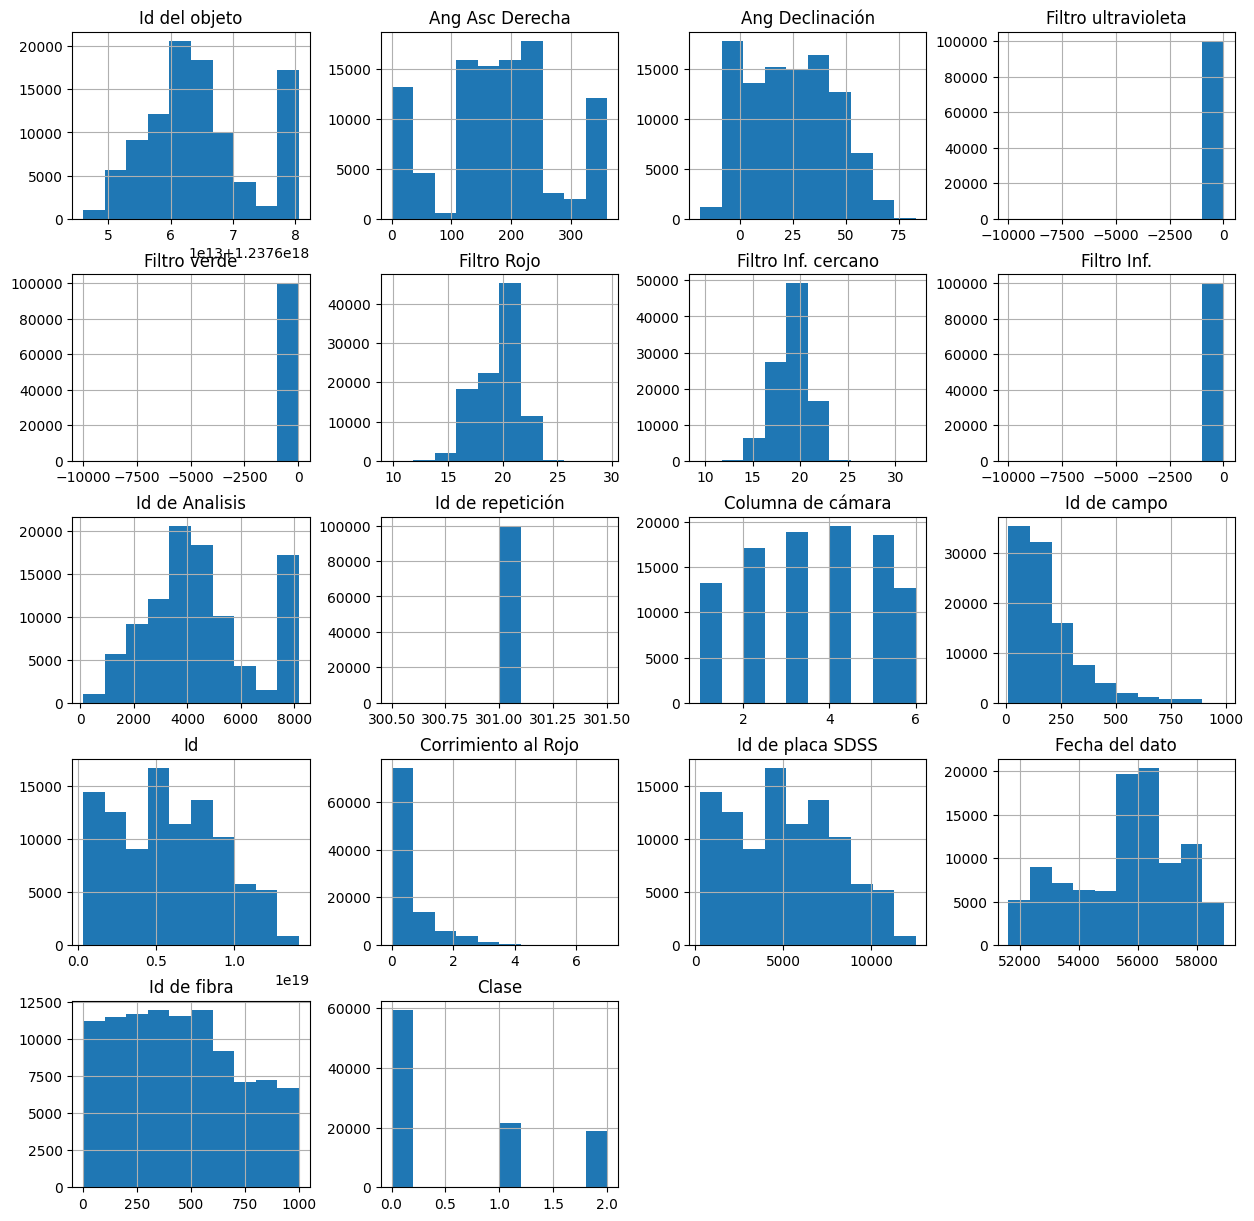

In [12]:
df_limpio.hist(figsize=(15, 15))

####Como observamos una varianza de datos, optamos por trabajarlos por cuartiles, para alejar los valores atípicos.
####Para esto, primero sacamos las columnas "clase" y "Corrimiento al Rojo", luego separamos los cuartiles iniciales y finales, tomamos la diferencia (IQR) y aplicamos la ecuación del 1.5. Sacamos del "df_limpio" las filas con valores atípicos, volvemos a colocar las columnas que sacamos, limpiamos los NaN posibles e imprimimos los nuevos histogramas:

array([[<Axes: title={'center': 'Id del objeto'}>,
        <Axes: title={'center': 'Ang Asc Derecha'}>,
        <Axes: title={'center': 'Ang Declinación'}>,
        <Axes: title={'center': 'Filtro ultravioleta'}>],
       [<Axes: title={'center': 'Filtro verde'}>,
        <Axes: title={'center': 'Filtro Rojo'}>,
        <Axes: title={'center': 'Filtro Inf. cercano'}>,
        <Axes: title={'center': 'Filtro Inf.'}>],
       [<Axes: title={'center': 'Id de Analisis'}>,
        <Axes: title={'center': 'Id de repetición'}>,
        <Axes: title={'center': 'Columna de cámara'}>,
        <Axes: title={'center': 'Id de campo'}>],
       [<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Corrimiento al Rojo'}>,
        <Axes: title={'center': 'Id de placa SDSS'}>,
        <Axes: title={'center': 'Fecha del dato'}>],
       [<Axes: title={'center': 'Id de fibra'}>,
        <Axes: title={'center': 'Clase'}>, <Axes: >, <Axes: >]],
      dtype=object)

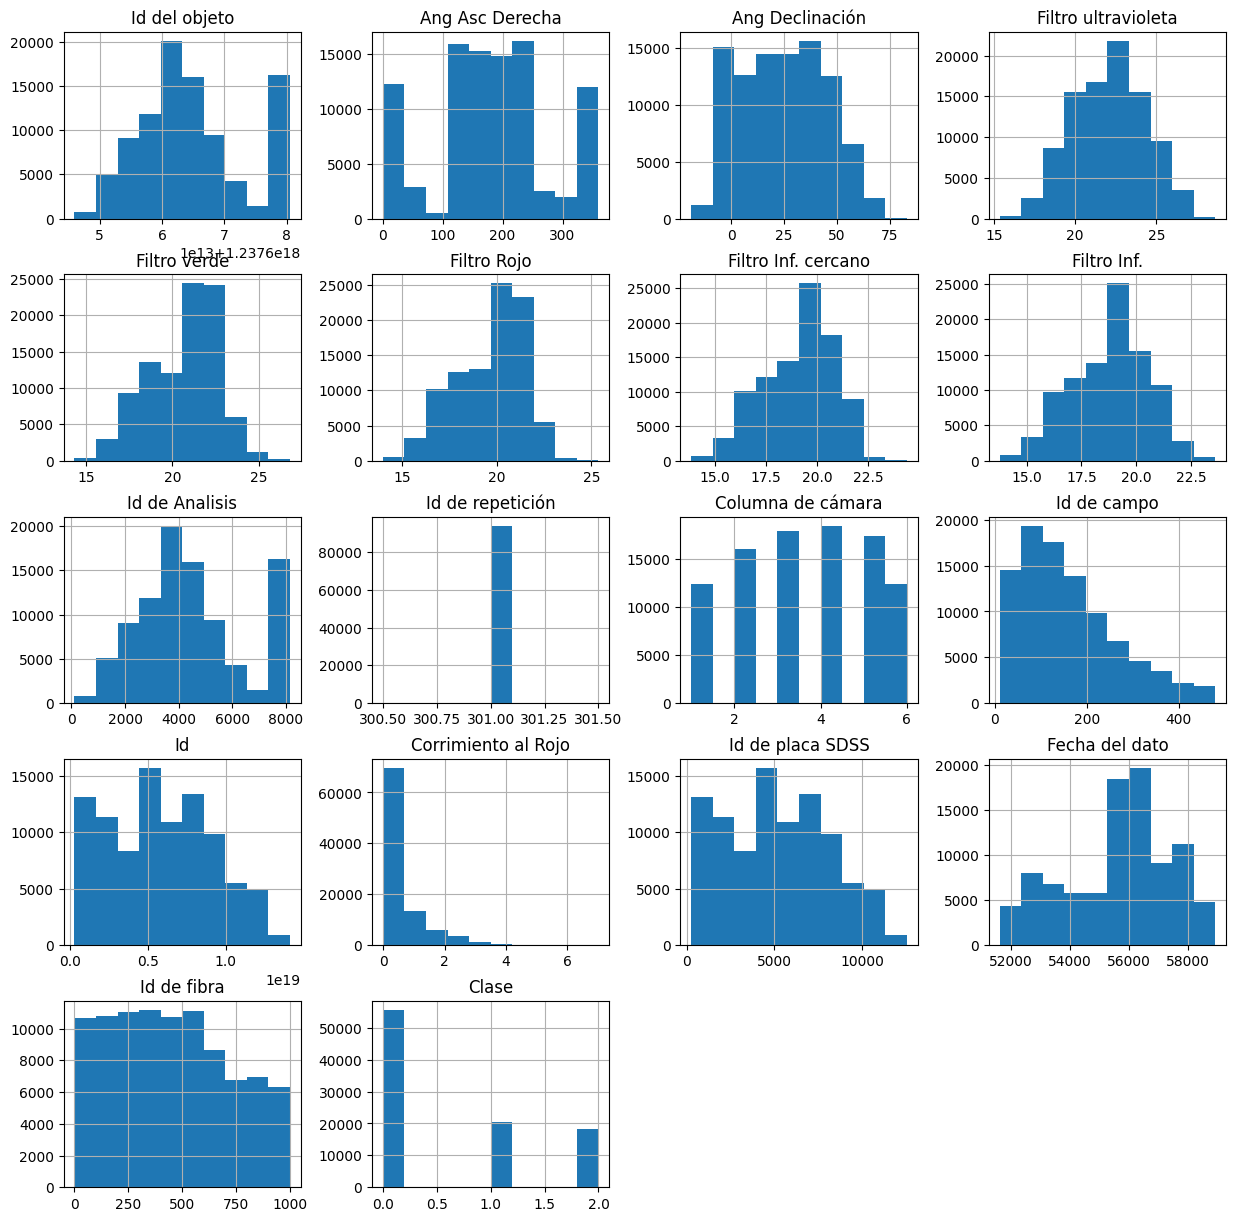

In [13]:
# Primero sacamos las columnas detalladas
df_limpio_salida = df_limpio['Clase']
df_limpio_red = df_limpio['Corrimiento al Rojo']

# Separamos los cuartiles teniendo encuenta antes del 25%, y luego del 75%
Q1 = df_limpio.quantile(0.25)
Q3 = df_limpio.quantile(0.75)

# Tomamos la diferencia para poder laburar
IQR = Q3 - Q1

# Teniendo en cuenta el IQR aplicamos la ecuación del 1.5
atipicos = ((df_limpio < (Q1 - 1.5 * IQR)) | (df_limpio > (Q3 + 1.5 * IQR)))

# Sacamos del df_limpio las filas con valores atípicos
df_limpio = df_limpio.where(np.invert(atipicos))

# Volvemos a colocar las columnas que sacamos para no generar NaNs que desequilibran la base
df_limpio['Clase'] = df_limpio_salida
df_limpio['Corrimiento al Rojo'] = df_limpio_red

# Limpiamos los NaN que se puedan haber generado
df_limpio = df_limpio.dropna()

# Nuevos histogramas
df_limpio.hist(figsize=(15, 15))

####Como podemos observar en los histogramas, contemplamos como la distribución de datos se hizo mas armónica que antes de quitar los cuartiles, entendiendo que los valores atípicos generan un desvalance en la distribución general de los datos.

####Ahora realizaremos una estadística rápida de los datos normalizados, excluyendo la columna "clase":

In [14]:
df_limpio_salida = df_limpio['Clase']

df_limpio_stats = df_limpio.describe().T
df_limpio_n = (df_limpio - df_limpio_stats['mean']) / df_limpio_stats['std']  # Para normalizar: (valor - promedio) / desv_estandar

df_limpio_n['Clase'] = df_limpio_salida

df_limpio_n.describe()


,Id del objeto,Ang Asc Derecha,Ang Declinación,Filtro ultravioleta,Filtro verde,Filtro Rojo,Filtro Inf. cercano,Filtro Inf.,Id de Analisis,Id de repetición,Columna de cámara,Id de campo,Id,Corrimiento al Rojo,Id de placa SDSS,Fecha del dato,Id de fibra,Clase
count,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,0.0,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,9.423000e+04,94230.000000
mean,1.537829e-11,2.967947e-16,3.559123e-17,-1.421953e-15,-9.240147e-16,1.056426e-16,-1.542563e-15,1.503579e-15,8.445377e-18,NaN,-9.772508e-17,-1.375390e-16,2.997355e-16,2.412965e-18,6.756302e-17,-5.741348e-16,-1.568427e-17,0.602706
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.790908
min,-2.220194e+00,-1.874779e+00,-2.225193e+00,-3.017696e+00,-3.146584e+00,-3.104853e+00,-3.030083e+00,-2.885179e+00,-2.220215e+00,NaN,-1.587325e+00,-1.431396e+00,-1.684375e+00,-8.078466e-01,-1.684356e+00,-2.252299e+00,-1.641947e+00,0.000000
25%,-6.585988e-01,-5.243745e-01,-9.182433e-01,-7.743911e-01,-8.246431e-01,-8.198730e-01,-7.754395e-01,-7.462537e-01,-6.586893e-01,NaN,-9.581692e-01,-7.823020e-01,-8.926849e-01,-7.167002e-01,-8.926750e-01,-6.781511e-01,-8.412472e-01,0.000000
50%,-1.614992e-01,5.843449e-03,-7.742845e-04,4.135116e-02,2.315774e-01,2.629905e-01,1.845515e-01,1.340043e-01,-1.614010e-01,NaN,3.001427e-01,-2.095718e-01,-5.672465e-02,-2.027057e-01,-5.674718e-02,1.611709e-01,-6.248453e-02,0.000000
75%,4.508342e-01,5.807933e-01,8.074450e-01,7.147557e-01,7.329122e-01,7.565672e-01,7.554135e-01,6.567189e-01,4.508026e-01,NaN,9.292986e-01,5.540685e-01,7.485283e-01,1.757785e-01,7.485481e-01,6.551527e-01,7.272466e-01,1.000000
max,1.874697e+00,1.867804e+00,2.959903e+00,2.918567e+00,3.059649e+00,3.117907e+00,3.047688e+00,2.763571e+00,1.874532e+00,NaN,1.558455e+00,3.035899e+00,2.495655e+00,8.747721e+00,2.495623e+00,1.840374e+00,2.010560e+00,2.000000


####Estas transformaciones nos ayudan a estandarizar los datos para que sean comparables en escala y asegurar que el data frame esté listo para usarse.


####Todo muy lindo, pero mejor grafiquemos las correlaciones:

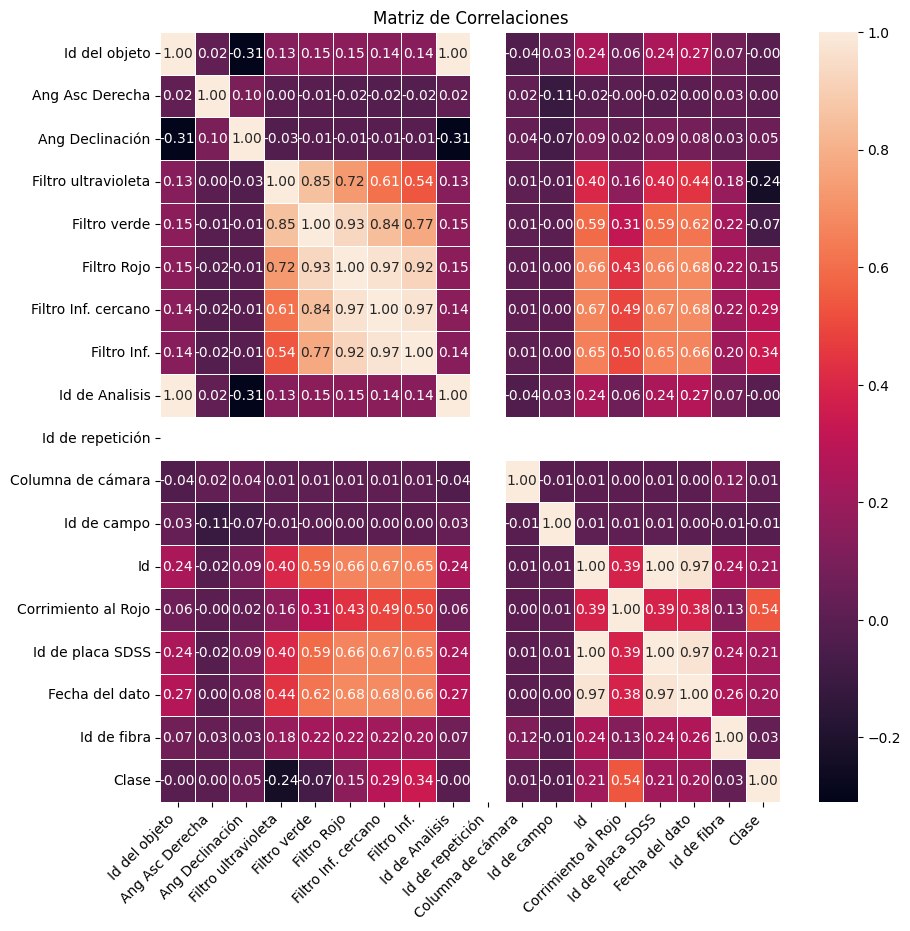

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_limpio.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
ax.set_xticklabels(df_limpio.columns.to_list(), rotation=45, ha='right')
plt.title("Matriz de Correlaciones")
plt.show()


####Ahora con una mejor visión de los datos, podemos observar que las siguientes columnas estan correlacionadas con nuestra columna de salida "clase":
####-Filtro Ultravioleta
####-Filtro Rojo
####-Filtro Infrarojo Cercano
####-Filtro Infrarojo
####-Id
####-Corrimiento al Rojo
####-Id de placa SDSS
####-Fecha del dato

####Al ver las columnas que se correlacionan con nuestra salida, podemos descartar "Id", "Id de placa SDSS" y "Fecha del dato", dado que no son datos observables en el espacio, si no mas bien, identificaciones posteriores.

####Entonces manos a la obra, limpiemos nuestro data frame de los datos que no son correlativos:

In [16]:
df_limpio = df_limpio.drop ('Id del objeto', axis = 1)
df_limpio = df_limpio.drop ('Ang Asc Derecha', axis = 1)
df_limpio = df_limpio.drop ('Ang Declinación', axis = 1)
# df_limpio = df_limpio.drop ('Filtro ultravioleta', axis = 1)
df_limpio = df_limpio.drop ('Filtro verde', axis = 1)
# df_limpio = df_limpio.drop ('Filtro Rojo', axis = 1)
# df_limpio = df_limpio.drop ('Filtro Inf. cercano', axis = 1)
# df_limpio = df_limpio.drop ('Filtro Inf.', axis = 1)
df_limpio = df_limpio.drop ('Id de Analisis', axis = 1)
df_limpio = df_limpio.drop ('Id de repetición', axis = 1)
df_limpio = df_limpio.drop ('Columna de cámara', axis = 1)
df_limpio = df_limpio.drop ('Id de campo', axis = 1)
df_limpio = df_limpio.drop ('Id', axis = 1)
df_limpio = df_limpio.drop ('Id de placa SDSS', axis = 1)
df_limpio = df_limpio.drop ('Fecha del dato', axis = 1)
df_limpio = df_limpio.drop ('Id de fibra', axis = 1)


####Volvamos a imprimir esa matriz de correlaciones y veamos que limpia y bonita quedó:

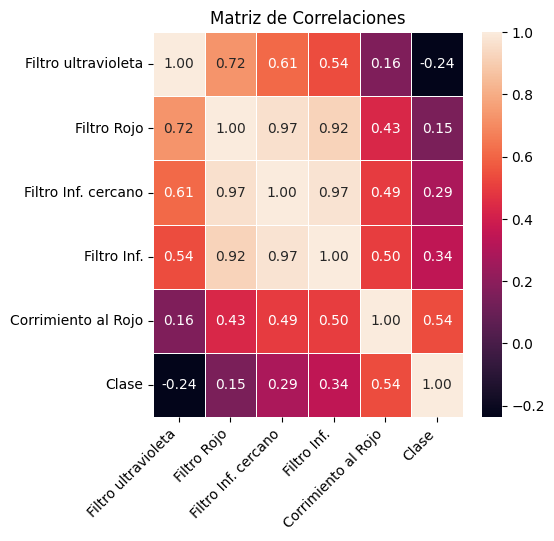

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_limpio.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
ax.set_xticklabels(df_limpio.columns.to_list(), rotation=45, ha='right')
plt.title("Matriz de Correlaciones")
plt.show()

# Código para descargar el data frame limpio
# from google.colab import files
# df_limpio.to_csv('df_limpio.csv', index=False)
# files.download("df_limpio.csv")


####Después de este análisis tan extausivo, en vista de esta última matriz de correlaciones y usando estas últimas variables (Filtro Ultravioleta, Filtro Rojo, Filtro Infrarojo Cercano, Filtro Infrarojo y Corrimiento al Rojo) podemos concluír que nuestra base de datos es adecuada para entrenar una red neuronal, para determinar si un objeto observado en el espacio es una estrella, galaxia o cuásar.